In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load dataset
MovieDataPath = "COPYMovieData_Clean.csv"

In [4]:
#print to inspect
movie_ratings_df = pd.read_csv(MovieDataPath) 
print(movie_ratings_df.shape)
movie_ratings_df.head()

(714, 12)


,Movie_Title,Released_Year,Rating,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross,Num_Genres
0,The Shawshank Redemption,1994,R,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469,1
1,The Godfather,1972,R,175,Crime,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411,2
2,The Dark Knight,2008,PG-13,152,Action,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444,3
3,The Godfather: Part II,1974,R,202,Crime,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000,2
4,12 Angry Men,1957,G,96,Crime,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000,2


In [34]:
#print with info that I need: Ratings - certificate, imbd, meta
movie_rating_df = movie_ratings_df.loc[:,['Rating', 'IMDB_Rating', 'Meta_score']]
movie_rating_df.head()

,Rating,IMDB_Rating,Meta_score
0,R,9.3,80.0
1,R,9.2,100.0
2,PG-13,9.0,84.0
3,R,9.0,90.0
4,G,9.0,96.0


In [98]:
# Group by the 'Rating' column
grouped = movie_ratings_df.groupby('Rating')

# Calculate the mean of 'IMBD average' for each group
average_rating = grouped['IMDB_Rating'].mean()

# Calculate the mean of 'Meta avergae' for each group
average_score = grouped['Meta_score'].mean()

# Convert Meta Average from 0-100 scale to 1-10 scale
average_score_1_to_10 = (average_score / 10) + 1 

# Convert Meta Average from 0-100 scale to 1-10 scale
average_score_1_to_10 = [min((score / 10) +1, 10) for score in average_score]

# Print Meta Conversion
print("Original Meta Scores:\n", average_score)
print("Converted Meta Scores (1-10 scale):\n", average_score_1_to_10)

#Print Mean of IMDb ratings
print(average_rating)



Original Meta Scores:
 Rating
G        79.109375
PG       83.222222
PG-13    75.104972
R        76.432787
Name: Meta_score, dtype: float64
Converted Meta Scores (1-10 scale):
 [8.9109375, 9.322222222222223, 8.51049723756906, 8.64327868852459]
Rating
G        7.961979
PG       7.952778
PG-13    7.897238
R        7.943279
Name: IMDB_Rating, dtype: float64


In [59]:
#Define 
Rating = ['G', 'PG', 'PG-13', 'R']  # Movie certificate categories

#Index
average_rating.index

Index(['G', 'PG', 'PG-13', 'R'], dtype='object', name='Rating')

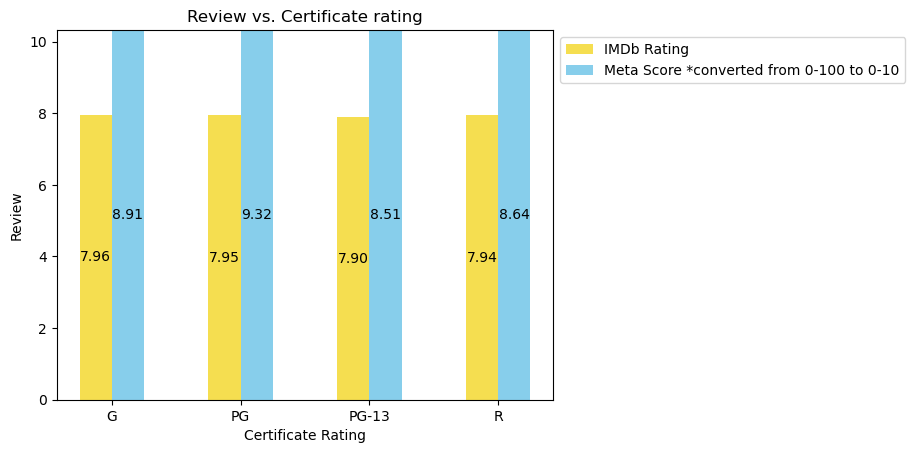

In [109]:
#Width of each bar
width = 0.25

#Define positions for groups
x = list(range(len(Rating)))

#Plot bars
bars1 = plt.bar([pos - width/2 for pos in x], average_rating, width, label='IMDb Rating', color='#F5DE50')
bars2 = plt.bar([pos + width/2 for pos in x], average_score, width, label='Meta Score *converted from 0-100 to 0-10', color='skyblue')

#Labels, Title, Legend, Legend Placement
plt.xlabel('Certificate Rating')
plt.ylabel('Review')
plt.title('Review vs. Certificate rating')

plt.bar_label(bars1, labels=[f'{val:.2f}' for val in average_rating], label_type='center', color='black')  # IMDb Ratings
plt.bar_label(bars2, labels=[f'{val:.2f}' for val in average_score_1_to_10], label_type='center', color='black')  # Meta Scores


plt.xticks(x, Rating)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncols=1)

plt.ylim(0, 10)
plt.ylim(0, max(max(average_rating), max(average_score_1_to_10)) + 1)


plt.show()

